<a id = "1"></a><br>
# Ignore this

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

<a id = "1"></a><br>
# Load and Check Data

DataFrames hold the dataset in a tabular format for easy manipulation and analysis. <br>
CSV data is read into 'df' using Pandas' read_csv() function.

In [2]:
train_df = pd.read_csv("./data/train.csv")

### 1. Try to read the test .csv file into test_df

In [3]:
test_df = pd.read_csv("./data/test.csv")
test_PassengerId = test_df["PassengerId"]

In [4]:
print("The Columns of train_df are: ")
train_df.columns

The Columns of train_df are: 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### We can use head() to see the first few rows in the dataframe

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Without looking above, try checking the first few rows of test_df

In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3. Now try checking for a description of test_df's data

In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Variable Description
<ol>
  <li><code>PassengerId: unique id number to each passenger</code></li>
  <li><code>Survived: passenger survive(1) or died(0)</code></li>
  <li><code>Pclass: passenger class</code></li>
  <li><code>Name: name</code></li>
  <li><code>Sex: gender of passenger</code></li>
  <li><code>Age: age of passenger</code></li>
  <li><code>SibSp: number of siblings/spouses</code></li>
  <li><code>Parch: number of parents/children</code></li>
  <li><code>Ticket: ticket number</code></li>
  <li><code>Fare: amount of money spent on ticket</code></li>
  <li><code>Cabin: cabin category</code></li>
  <li><code>Embarked: port where passenger embarked ( C = Cherbourg, Q = Queenstown, S = Southampton )</code></li>
</ol>


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Slice Rows and Columsn of DF (Assigmennt)

In [10]:
# Printing the Second Row
train_df.iloc[2]

PassengerId                         3
Survived                            1
Pclass                              3
Name           Heikkinen, Miss. Laina
Sex                            female
Age                              26.0
SibSp                               0
Parch                               0
Ticket               STON/O2. 3101282
Fare                            7.925
Cabin                             NaN
Embarked                            S
Name: 2, dtype: object

In [11]:
# Print the 5th Row
train_df.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [12]:
# Print the Sex Column
train_df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [13]:
# Print the Name Column
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

## Visualization (Assignment)

### Age -- Survived

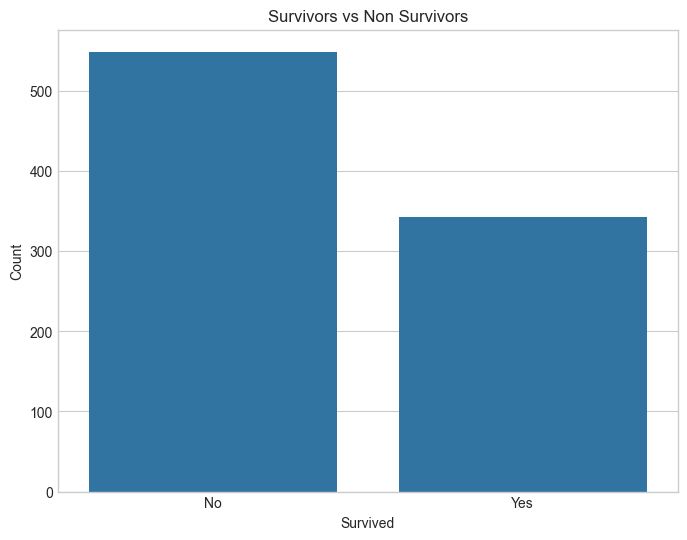

In [14]:
plt.figure(figsize=(8, 6))
# Plot 1: Survivors vs Non Survivors

# Creating a plot for the Survived Column
sns.countplot(x='Survived', data=train_df)

plt.title('Survivors vs Non Survivors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Setting custom tick labels
plt.show()

### Try Plotting Passenger Class

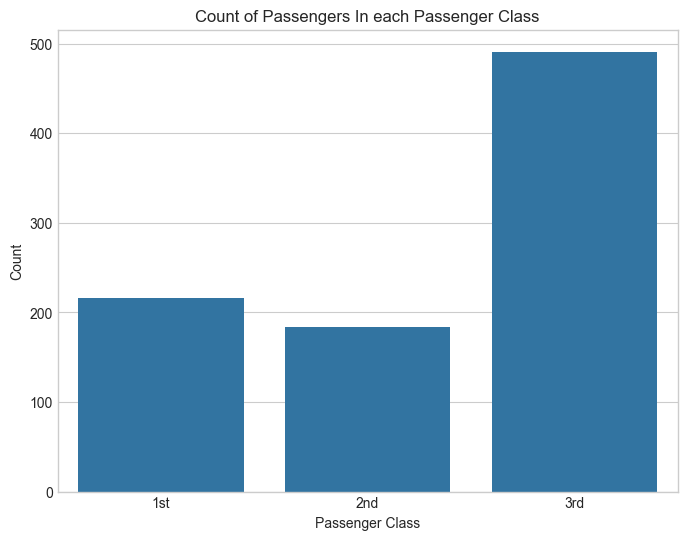

In [15]:
plt.figure(figsize=(8, 6))

# Make the plot for Pclass here:
sns.countplot(x='Pclass', data=train_df)

plt.title('Count of Passengers In each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])  # Setting custom tick labels
plt.show()

### Try it for "Embarked"

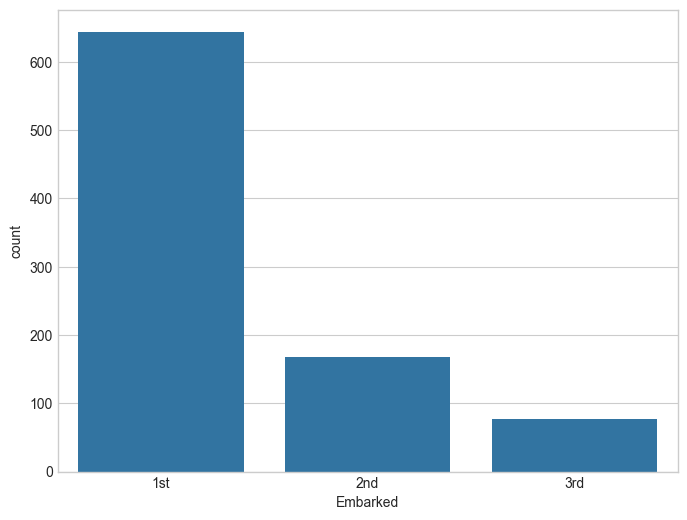

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=train_df)
plt.xticks([0, 1, 2], ['1st', '2nd', '3rd'])  # Setting custom tick labels
plt.show()

### Try Making a histogram for "Fare"

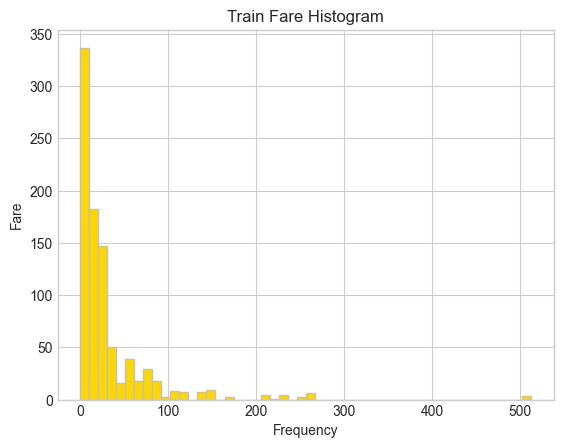

In [17]:
plt.hist(train_df['Fare'],bins=50,color='gold', edgecolor='silver')
plt.title('Train Fare Histogram')
plt.ylabel('Fare')
plt.xlabel('Frequency')
plt.show()

### Here is the distplot for "Fare", refer to it after you tried it yourself:

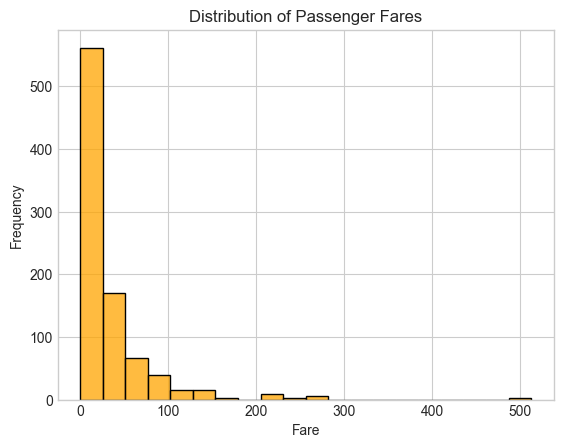

In [18]:
sns.histplot(train_df['Fare'], bins=20, color='orange')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### Make a histogram for "Age" (Assignment)

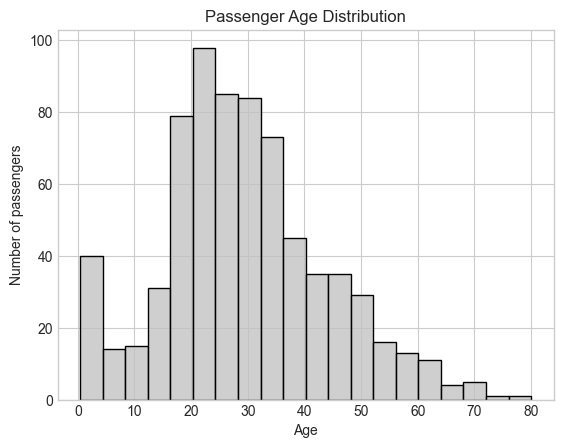

In [19]:
# Create the plot below
sns.histplot(train_df['Age'], bins=20, color='silver')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

<a id = "20"></a><br>
## Fill Missing: Age Feature

In [20]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### Try Checking for Null Values in Test Df

In [21]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Run this to fix the Null Values

In [22]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

index_nan_age = list(test_df["Age"][test_df["Age"].i snull()].index)
for i in index_nan_age:
    age_pred = test_df["Age"][((test_df["SibSp"] == test_df.iloc[i]["SibSp"]) &(test_df["Parch"] == test_df.iloc[i]["Parch"])& (test_df["Pclass"] == test_df.iloc[i]["Pclass"]))].median()
    age_med = test_df["Age"].median()
    if not np.isnan(age_pred):
        test_df["Age"].iloc[i] = age_pred
    else:
        test_df["Age"].iloc[i] = age_med

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2212395984.py, line 10)

## Analysing the correlation between the different columns

<Axes: >

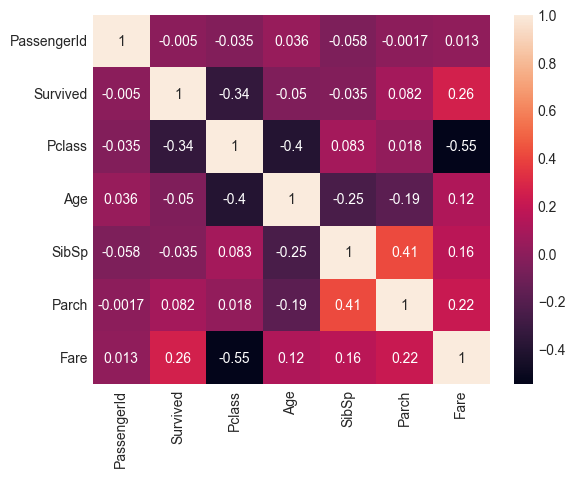

In [ ]:
numerical_columns = train_df.select_dtypes(include=[np.number]).columns
sns.heatmap(train_df[numerical_columns].corr(), annot=True)

We see that Fare and Parch are positively correlated with Survived. Similarly, Fare and Class are negatively correlated, in the sense that the higher the higher the Fare, the lower the Class number (Remember that Class 1 < Class 2 < Class 3 in face value).

## Embarked

In [ ]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

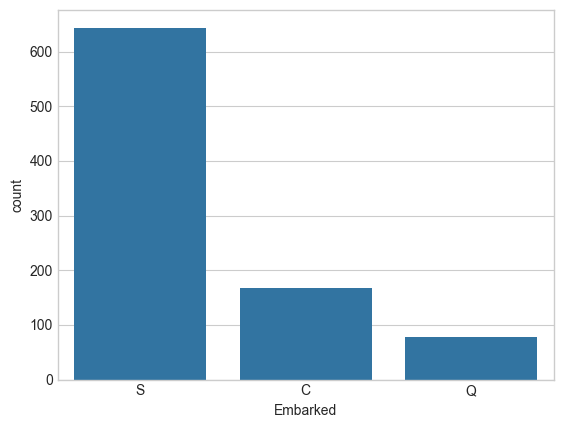

In [ ]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [ ]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [ ]:
test_df = pd.get_dummies(test_df, columns=["Embarked"])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,False,False,True


## Ticket (Assignment)

In [ ]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [ ]:
example_ticket = "A/5. 2151"
example_ticket.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [ ]:
train_Tickets = []
test_Tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        train_Tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        train_Tickets.append("x")
train_df["Ticket"] = train_Tickets

# Do the same for the test set
for i in list(test_df.Ticket):
    if not i.isdigit():
        test_Tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        test_Tickets.append("x")
test_df["Ticket"] = test_Tickets

In [ ]:
print(train_df["Ticket"].head(20))
print("*******************\n")
test_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object
*******************



0           x
1           x
2           x
3           x
4           x
5           x
6           x
7           x
8           x
9          A4
10          x
11          x
12          x
13          x
14        WEP
15    SCPARIS
16          x
17          x
18     STONO2
19          x
Name: Ticket, dtype: object

In [ ]:
test_df["Ticket"].head(20)

0           x
1           x
2           x
3           x
4           x
5           x
6           x
7           x
8           x
9          A4
10          x
11          x
12          x
13          x
14        WEP
15    SCPARIS
16          x
17          x
18     STONO2
19          x
Name: Ticket, dtype: object

In [ ]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "TcktName")
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,TcktName_SOPP,TcktName_SOTONO2,TcktName_SOTONOQ,TcktName_SP,TcktName_STONO,TcktName_STONO2,TcktName_SWPP,TcktName_WC,TcktName_WEP,TcktName_x
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,...,False,False,False,False,False,False,False,False,False,True
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,8.4583,NaN,...,False,False,False,False,False,False,False,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,...,False,False,False,False,False,False,False,False,False,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,...,False,False,False,False,False,False,False,False,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,...,False,False,False,False,False,False,False,False,False,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
test_df = pd.get_dummies(test_df, columns= ["Ticket"], prefix = "TcktName")
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,...,TcktName_SOC,TcktName_SOPP,TcktName_SOTONO2,TcktName_SOTONOQ,TcktName_STONO,TcktName_STONO2,TcktName_STONOQ,TcktName_WC,TcktName_WEP,TcktName_x
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,False,...,False,False,False,False,False,False,False,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,False,...,False,False,False,False,False,False,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,False,...,False,False,False,False,False,False,False,False,False,True
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,False,...,False,False,False,False,False,False,False,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,NaN,False,...,False,False,False,False,False,False,False,False,False,True
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,NaN,False,...,False,False,False,False,False,False,False,False,False,True
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,NaN,True,...,False,False,False,False,False,False,False,False,False,True
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,NaN,False,...,False,False,False,False,False,False,False,False,False,False


<a id = "26"></a><br>
## Pclass

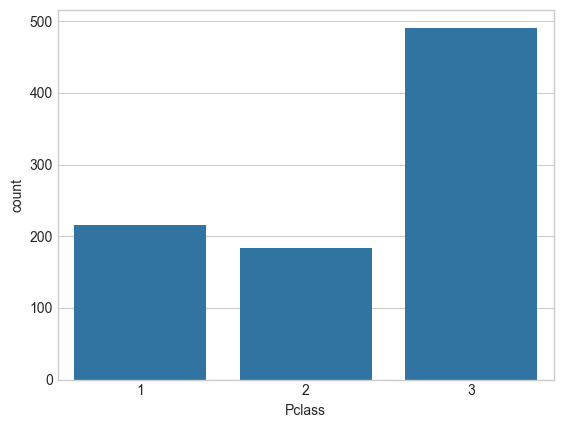

In [ ]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [ ]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,...,TcktName_SP,TcktName_STONO,TcktName_STONO2,TcktName_SWPP,TcktName_WC,TcktName_WEP,TcktName_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,False,...,False,False,True,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
test_df["Pclass"] = test_df["Pclass"].astype("category")
test_df = pd.get_dummies(test_df, columns= ["Pclass"])
test_df.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,...,TcktName_SOTONOQ,TcktName_STONO,TcktName_STONO2,TcktName_STONOQ,TcktName_WC,TcktName_WEP,TcktName_x,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,False,True,...,False,False,False,False,False,False,True,False,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,False,True,...,False,False,False,False,False,False,True,False,True,False
3,895,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


<a id = "27"></a><br>
## Sex

In [ ]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,...,TcktName_STONO2,TcktName_SWPP,TcktName_WC,TcktName_WEP,TcktName_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,False,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,False,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,True,False,False,True,False,True


In [ ]:
test_df["Sex"] = test_df["Sex"].astype("category")
test_df = pd.get_dummies(test_df, columns=["Sex"])
test_df.head()

,PassengerId,Name,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,...,TcktName_STONO2,TcktName_STONOQ,TcktName_WC,TcktName_WEP,TcktName_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,7.8292,NaN,False,True,False,...,False,False,False,False,True,False,False,True,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,NaN,False,False,True,...,False,False,False,False,True,False,False,True,True,False
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,NaN,False,True,False,...,False,False,False,False,True,False,True,False,False,True
3,895,"Wirz, Mr. Albert",27.0,0,0,8.6625,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,NaN,False,False,True,...,False,False,False,False,True,False,False,True,True,False


## Drop Passenger ID and Cabin (Assignment)

In [ ]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [ ]:
train_df.columns

Index(['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'TcktName_A4', 'TcktName_A5', 'TcktName_AS',
       'TcktName_C', 'TcktName_CA', 'TcktName_CASOTON', 'TcktName_FC',
       'TcktName_FCC', 'TcktName_Fa', 'TcktName_LINE', 'TcktName_PC',
       'TcktName_PP', 'TcktName_PPP', 'TcktName_SC', 'TcktName_SCA4',
       'TcktName_SCAH', 'TcktName_SCOW', 'TcktName_SCPARIS',
       'TcktName_SCParis', 'TcktName_SOC', 'TcktName_SOP', 'TcktName_SOPP',
       'TcktName_SOTONO2', 'TcktName_SOTONOQ', 'TcktName_SP', 'TcktName_STONO',
       'TcktName_STONO2', 'TcktName_SWPP', 'TcktName_WC', 'TcktName_WEP',
       'TcktName_x', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [ ]:
# Drop the PassengerId and Cabin columns from the test set
test_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [ ]:
# Print the columns of the test set
test_df.columns

Index(['Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'TcktName_A', 'TcktName_A4', 'TcktName_A5',
       'TcktName_AQ3', 'TcktName_AQ4', 'TcktName_C', 'TcktName_CA',
       'TcktName_FC', 'TcktName_FCC', 'TcktName_LP', 'TcktName_PC',
       'TcktName_PP', 'TcktName_SC', 'TcktName_SCA3', 'TcktName_SCA4',
       'TcktName_SCAH', 'TcktName_SCPARIS', 'TcktName_SCParis', 'TcktName_SOC',
       'TcktName_SOPP', 'TcktName_SOTONO2', 'TcktName_SOTONOQ',
       'TcktName_STONO', 'TcktName_STONO2', 'TcktName_STONOQ', 'TcktName_WC',
       'TcktName_WEP', 'TcktName_x', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')

<a id = "29"></a><br>
# Modeling

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Train - Test Split (Assignment)

In [ ]:
train_df_len = len(train_df)
train_df_len

891

In [ ]:
train = train_df[:train_df_len]
test = test_df

# Select all numerical values from train and test
numeric_train = train.select_dtypes(include=[np.number])
numeric_test = test.select_dtypes(include=[np.number]) 


X_train = numeric_train.drop(labels=["Survived",], axis=1)
y_train = numeric_train["Survived"]

# Split the train data into train and test sets with a 1/3 ratio
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1/3, random_state=42)# Use the train_test_split function here

print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))
print("test", len(numeric_test))

NameError: name 'train_test_split' is not defined

## Simple Logistic Regression (Assignment)

In [ ]:
logreg_train = LogisticRegression()
logreg_test = LogisticRegression()
logreg_train.fit(X_train, y_train)
logreg_test.fit(X_train, y_train)
acc_log_train = round(logreg_train.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg_test.score(X_test,y_test)*100,2)
# Print the accuracy on the training and test set
print(acc_log_train)
print(acc_log_test)

68.52
69.36


<a id = "32"></a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [ ]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


0.6952824858757062
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7136440677966102
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.7052259887005649
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.6783050847457627
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7001129943502825


Text(0.5, 1.0, 'Cross Validation Scores')

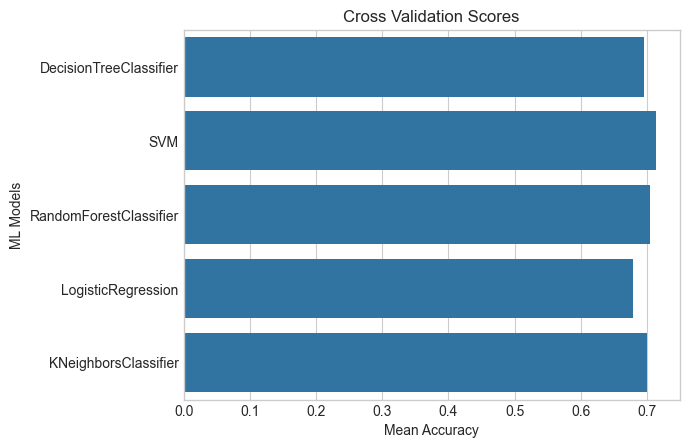

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
       "LogisticRegression",
       "KNeighborsClassifier"]})

g = sns.barplot(x="Cross Validation Means",y= "ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

## Ensemble Modeling (Assignment)

In [ ]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)

# Print the accuracy score of the voting classifier
acc_votingC = round(votingC.score(X_train,y_train)*100,2)
print(f"Accuracy score of the voting classifier : {acc_votingC}%")

Accuracy score of the voting classifier : 74.58%


In [ ]:
# Drop the null values which are going to cause you an error in the next cell
# dropping NaN values in X_train and y_train
X_train_drop = X_train.drop(X_train[X_train.isna()].index)
y_train_drop = y_train[X_train_drop.index]
# print(len(y_train))

# dropping NaN values in X_train and y_train
X_test_drop = X_test.drop(X_test[X_test.isna()].index)
y_test_drop = y_test[X_test_drop.index]
# print(len(y_test))

<a id = "34"></a><br>
## Prediction and Submission

In [ ]:
test_survived = pd.Series(votingC.predict(X_test), name="Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived], axis=1)
results.to_csv("titanic.csv", index=False)
print(results)
print(X_test.sum())

     PassengerId  Survived
0            892       0.0
1            893       0.0
2            894       0.0
3            895       1.0
4            896       0.0
..           ...       ...
413         1305       NaN
414         1306       NaN
415         1307       NaN
416         1308       NaN
417         1309       NaN

[418 rows x 2 columns]
Age      8797.2500
SibSp     122.0000
Parch     117.0000
Fare     9741.2913
dtype: float64


# Congratulations on finishing the assignment!!

### The submission is the titanic.csv which was just created, and this file which you have modified.